# Advanced EDA Notebook: Customer Event Features

## Setup & Data Loading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set styling
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Load the data
INPUT_PATH = "segmentation/data/customer_events_features.csv"
df = pd.read_csv(INPUT_PATH)

print(" Dataset Successfully Loaded!")
print(f" Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")


 Dataset Successfully Loaded!
 Shape: 18,228 rows × 10 columns


## Data Overview


In [26]:
# Display basic information
print(" DATASET INFO")
print("=" * 50)
df.info()

print("\n FIRST 5 ROWS")
print("=" * 50)
display(df.head())

print("\n DATA TYPES BREAKDOWN")
print("=" * 50)
dtype_counts = df.dtypes.value_counts()
for dtype, count in dtype_counts.items():
    print(f"{dtype}: {count} columns")


 DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18228 entries, 0 to 18227
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   visitorid                 18228 non-null  int64  
 1   total_events              18228 non-null  int64  
 2   unique_items_viewed       18228 non-null  int64  
 3   total_transactions        18228 non-null  int64  
 4   num_views                 18228 non-null  int64  
 5   num_addtocarts            18228 non-null  int64  
 6   num_transactions          18228 non-null  int64  
 7   active_days               18228 non-null  int64  
 8   active_hours              18228 non-null  int64  
 9   session_duration_minutes  18228 non-null  float64
dtypes: float64(1), int64(9)
memory usage: 1.4 MB

 FIRST 5 ROWS


,visitorid,total_events,unique_items_viewed,total_transactions,num_views,num_addtocarts,num_transactions,active_days,active_hours,session_duration_minutes
0,17,1,1,0,1,0,0,1,1,0.00
1,52,1,1,0,1,0,0,1,1,0.00
2,74,4,3,0,4,0,0,1,1,3.82
3,137,1,1,0,1,0,0,1,1,0.00
4,202,1,1,0,1,0,0,1,1,0.00



 DATA TYPES BREAKDOWN
int64: 9 columns
float64: 1 columns


##  Statistical Summary


In [27]:
# Enhanced summary statistics
print(" NUMERICAL FEATURES SUMMARY")
print("=" * 60)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'visitorid' in numerical_cols:
    numerical_cols.remove('visitorid')

summary_stats = df[numerical_cols].describe()
display(summary_stats.round(2))

# Additional statistics
print("\n ADDITIONAL STATISTICS")
print("=" * 60)
additional_stats = pd.DataFrame({
    'Missing_Values': df[numerical_cols].isnull().sum(),
    'Missing_Percentage': (df[numerical_cols].isnull().sum() / len(df) * 100).round(2),
    'Unique_Values': df[numerical_cols].nunique(),
    'Skewness': df[numerical_cols].skew().round(2),
    'Kurtosis': df[numerical_cols].kurtosis().round(2)
})
display(additional_stats)


 NUMERICAL FEATURES SUMMARY


,total_events,unique_items_viewed,total_transactions,num_views,num_addtocarts,num_transactions,active_days,active_hours,session_duration_minutes
count,18228.00,18228.00,18228.00,18228.00,18228.00,18228.00,18228.00,18228.00,18228.00
mean,1.65,1.37,0.01,1.59,0.04,0.01,1.03,1.10,33.93
std,3.50,2.29,0.22,3.20,0.38,0.22,0.18,0.48,195.25
min,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00
25%,1.00,1.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00
50%,1.00,1.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00
75%,1.00,1.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00
max,272.00,180.00,11.00,257.00,21.00,11.00,3.00,13.00,2817.73



 ADDITIONAL STATISTICS


,Missing_Values,Missing_Percentage,Unique_Values,Skewness,Kurtosis
total_events,0,0.00,49,37.44,2329.06
unique_items_viewed,0,0.00,37,38.65,2449.39
total_transactions,0,0.00,11,32.85,1348.93
num_views,0,0.00,45,38.90,2561.72
num_addtocarts,0,0.00,13,26.12,999.44
num_transactions,0,0.00,11,32.85,1348.93
active_days,0,0.00,3,6.54,46.30
active_hours,0,0.00,12,9.42,139.80
session_duration_minutes,0,0.00,4212,7.43,59.84


## Correlation Analysis 

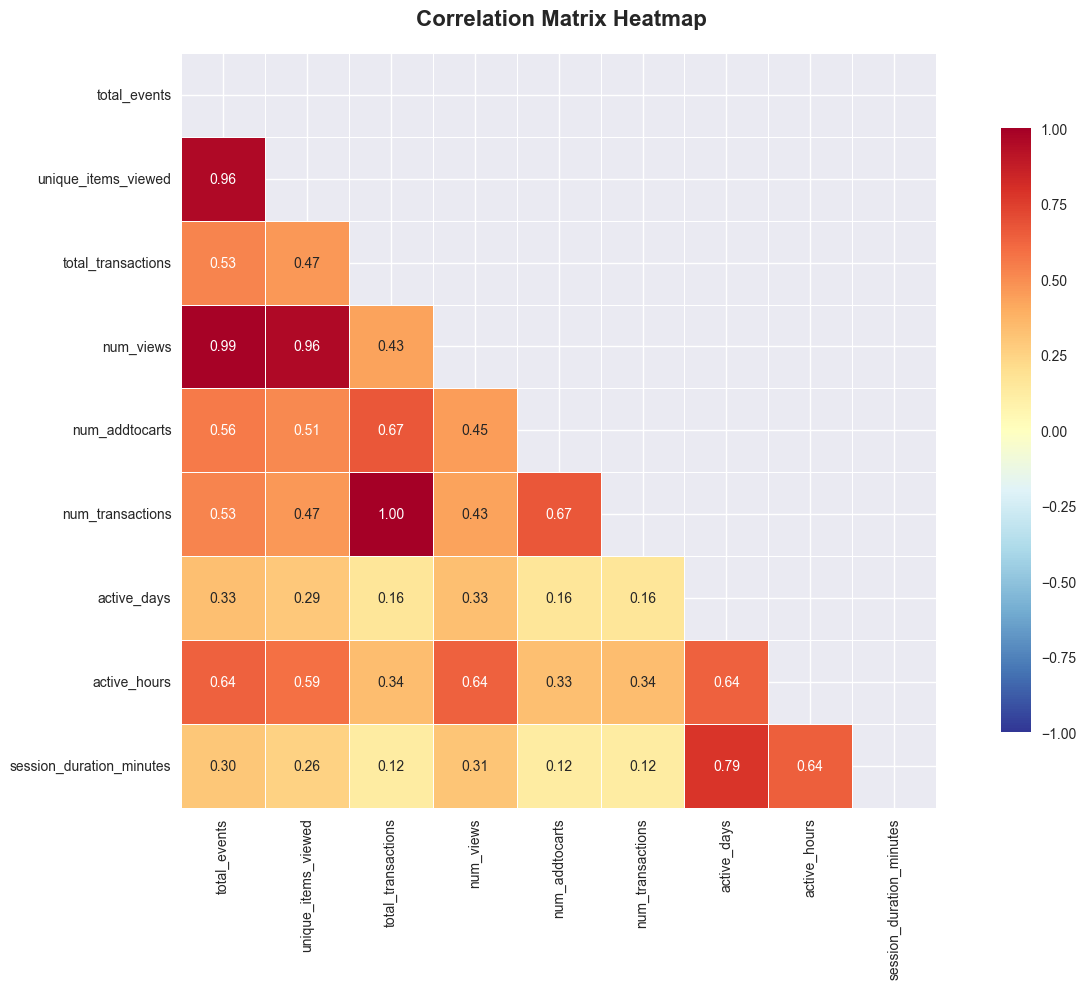


 HIGHLY CORRELATED FEATURE PAIRS
total_events ↔ unique_items_viewed: 0.960
total_events ↔ num_views: 0.991
unique_items_viewed ↔ num_views: 0.957
total_transactions ↔ num_transactions: 1.000
active_days ↔ session_duration_minutes: 0.788


In [28]:
# Enhanced correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Generate heatmap
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            fmt='.2f',
            cmap='RdYlBu_r',
            vmin=-1, vmax=1,
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": .8})

plt.title(' Correlation Matrix Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Find highly correlated pairs
print("\n HIGHLY CORRELATED FEATURE PAIRS")
print("=" * 50)
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:  # Threshold for high correlation
            high_corr_pairs.append((correlation_matrix.columns[i], 
                                  correlation_matrix.columns[j], 
                                  corr_val))

if high_corr_pairs:
    for pair in high_corr_pairs:
        print(f"{pair[0]} ↔ {pair[1]}: {pair[2]:.3f}")
else:
    print("No highly correlated pairs found (threshold: 0.7)")


## Feature Relationships


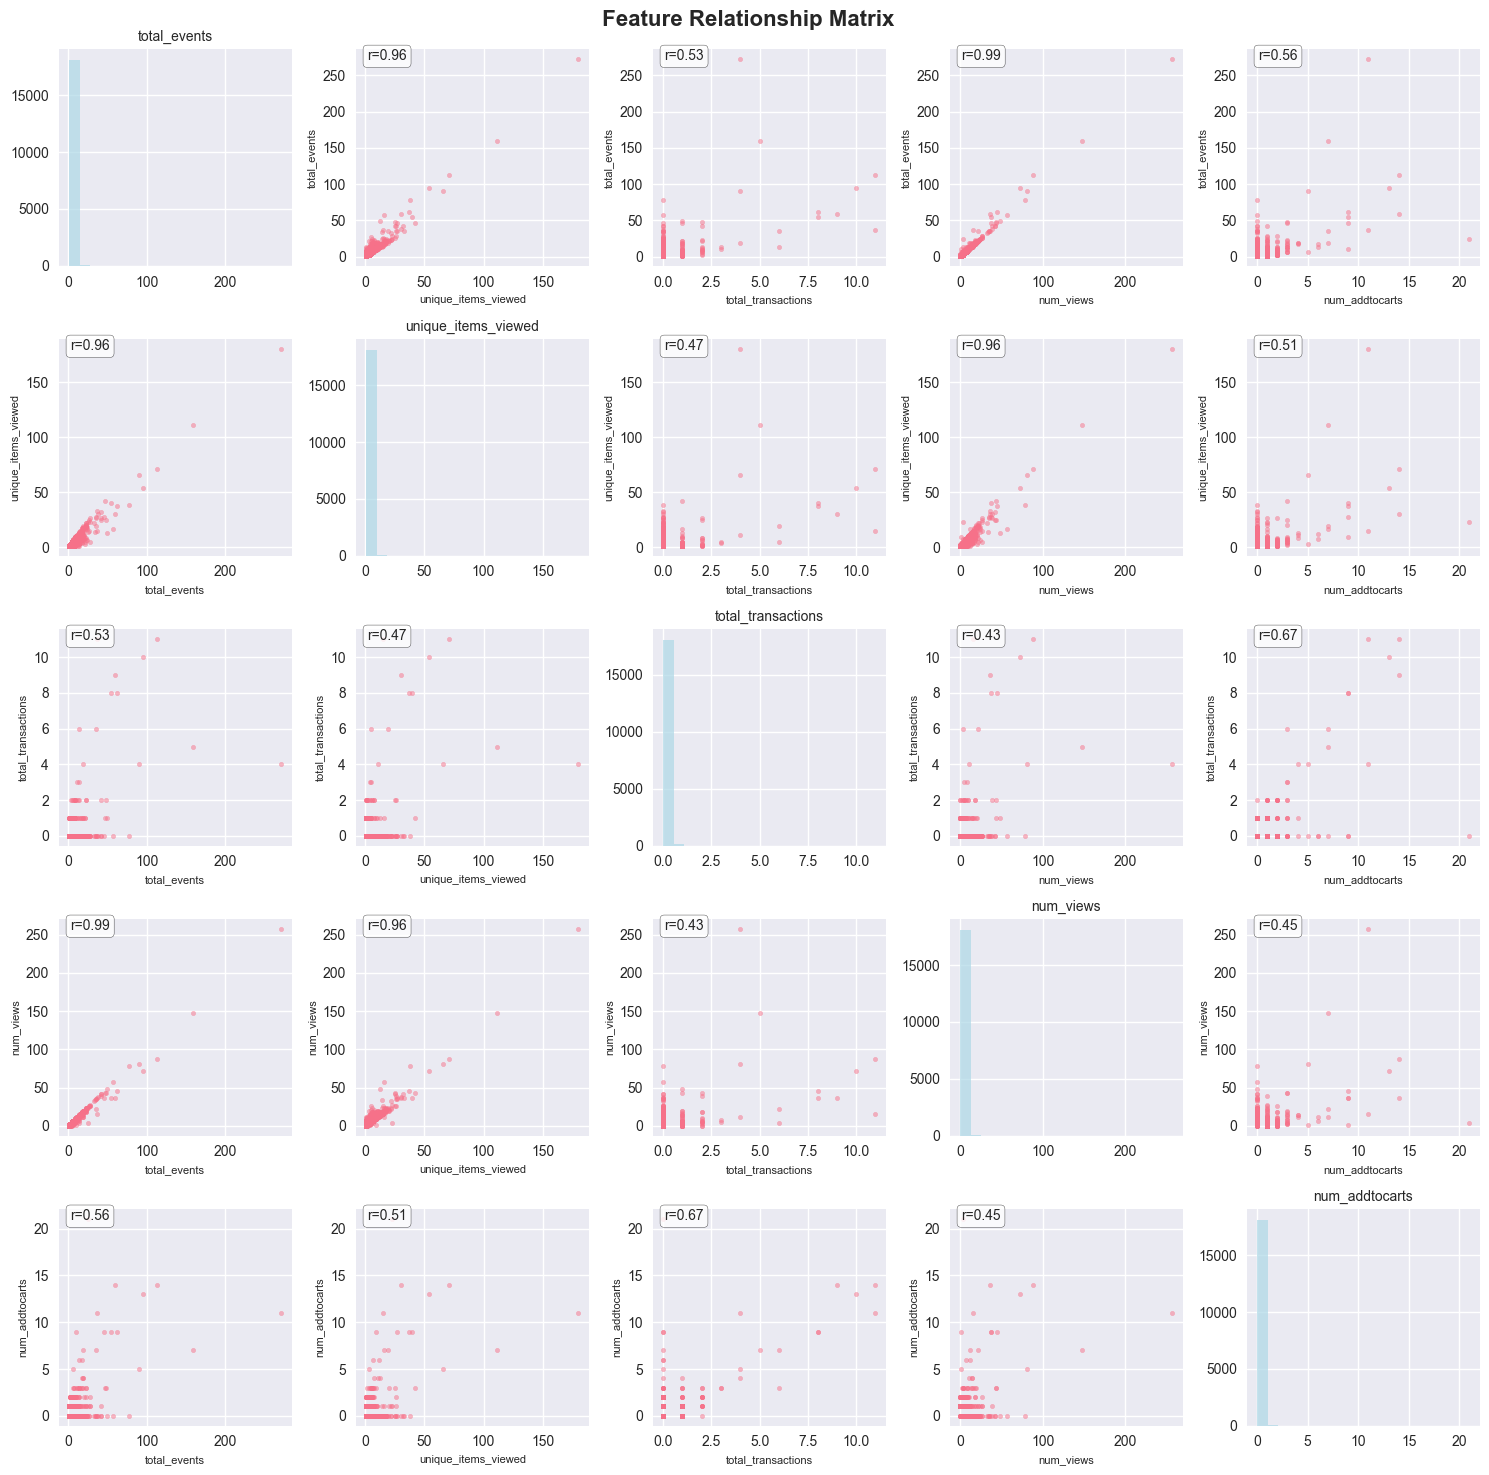

In [29]:
# Scatter plot matrix for key features
key_features = numerical_cols[:5]  # Select top 5 features
fig, axes = plt.subplots(nrows=len(key_features), ncols=len(key_features), 
                        figsize=(15, 15))
fig.suptitle(' Feature Relationship Matrix', fontsize=16, fontweight='bold')

for i, feature1 in enumerate(key_features):
    for j, feature2 in enumerate(key_features):
        if i == j:
            # Diagonal: histogram
            axes[i, j].hist(df[feature1].dropna(), bins=20, alpha=0.7, color='lightblue')
            axes[i, j].set_title(f'{feature1}', fontsize=10)
        else:
            # Off-diagonal: scatter plot
            axes[i, j].scatter(df[feature2], df[feature1], alpha=0.5, s=10)
            axes[i, j].set_xlabel(feature2, fontsize=8)
            axes[i, j].set_ylabel(feature1, fontsize=8)
            
            # Add correlation coefficient
            corr_coef = df[feature1].corr(df[feature2])
            axes[i, j].text(0.05, 0.95, f'r={corr_coef:.2f}', 
                           transform=axes[i, j].transAxes, 
                           bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()


## Statistical Insights


In [30]:
# Feature importance based on variance
print(" FEATURE VARIANCE ANALYSIS")
print("=" * 50)
feature_variance = df[numerical_cols].var().sort_values(ascending=False)
print("Features ranked by variance (higher = more variability):")
for feature, variance in feature_variance.head(10).items():
    print(f"{feature}: {variance:.2f}")


 FEATURE VARIANCE ANALYSIS
Features ranked by variance (higher = more variability):
session_duration_minutes: 38121.68
total_events: 12.24
num_views: 10.25
unique_items_viewed: 5.24
active_hours: 0.23
num_addtocarts: 0.14
total_transactions: 0.05
num_transactions: 0.05
active_days: 0.03


### 7. Outlier Analysis


 OUTLIER ANALYSIS


,Feature,Outlier_Count,Outlier_Percentage
0,total_events,4222,23.16
8,session_duration_minutes,4221,23.16
3,num_views,4160,22.82
1,unique_items_viewed,2825,15.50
7,active_hours,1325,7.27
6,active_days,492,2.70
4,num_addtocarts,459,2.52
2,total_transactions,147,0.81
5,num_transactions,147,0.81


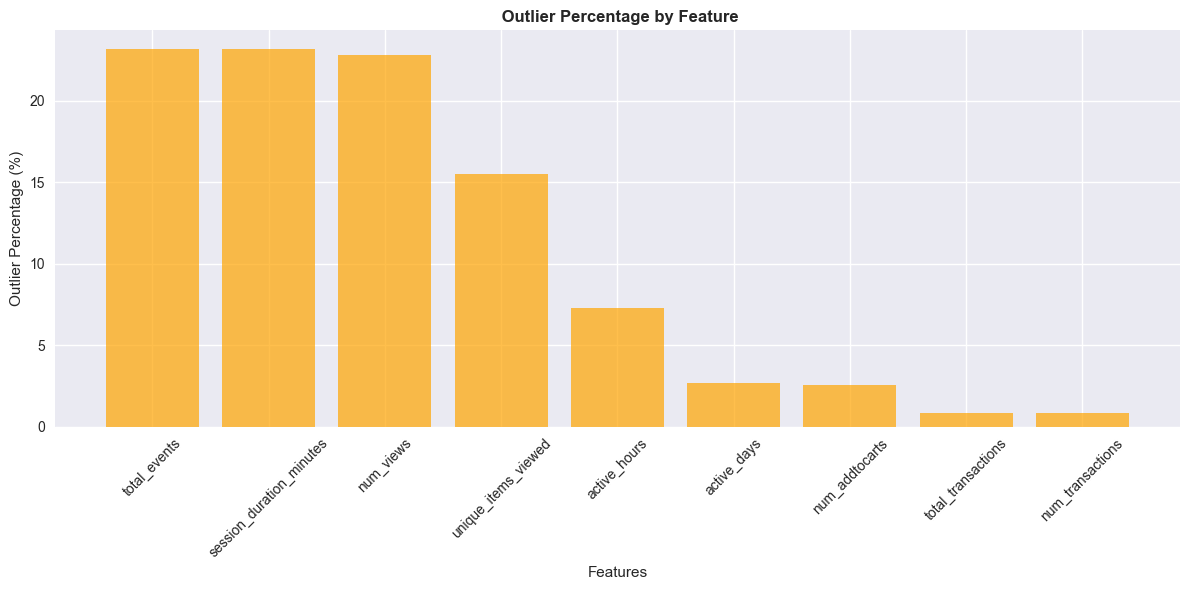

In [31]:
# Outlier detection using IQR method
def detect_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return len(outliers), (len(outliers) / len(data)) * 100

print(" OUTLIER ANALYSIS")
print("=" * 50)
outlier_summary = []

for feature in numerical_cols:
    outlier_count, outlier_percentage = detect_outliers_iqr(df, feature)
    outlier_summary.append({
        'Feature': feature,
        'Outlier_Count': outlier_count,
        'Outlier_Percentage': round(outlier_percentage, 2)
    })

outlier_df = pd.DataFrame(outlier_summary)
outlier_df = outlier_df.sort_values('Outlier_Percentage', ascending=False)
display(outlier_df)

# Visualize outlier percentages
plt.figure(figsize=(12, 6))
plt.bar(outlier_df['Feature'], outlier_df['Outlier_Percentage'], color='orange', alpha=0.7)
plt.title(' Outlier Percentage by Feature', fontweight='bold')
plt.ylabel('Outlier Percentage (%)')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##  Key Findings Summary


In [32]:
print(" KEY INSIGHTS SUMMARY")
print("=" * 60)

print(f"  Dataset Size: {df.shape[0]:,} records, {df.shape[1]} features")
print(f" Numerical Features: {len(numerical_cols)}")
print(f" Missing Values: {df.isnull().sum().sum()} total")

if len(high_corr_pairs) > 0:
    print(f" Highly Correlated Pairs: {len(high_corr_pairs)}")
else:
    print(" No highly correlated features found")

most_variable_feature = feature_variance.index[0]
print(f" Most Variable Feature: {most_variable_feature}")

highest_outlier_feature = outlier_df.iloc[0]['Feature']
highest_outlier_pct = outlier_df.iloc[0]['Outlier_Percentage']
print(f" Feature with Most Outliers: {highest_outlier_feature} ({highest_outlier_pct}%)")


 KEY INSIGHTS SUMMARY
  Dataset Size: 18,228 records, 10 features
 Numerical Features: 9
 Missing Values: 0 total
 Highly Correlated Pairs: 5
 Most Variable Feature: session_duration_minutes
 Feature with Most Outliers: total_events (23.16%)



*This EDA notebook provides a comprehensive analysis of your customer event features dataset. Each visualization and analysis provides actionable insights for your data science workflow.*